In [7]:
import pandas
import seaborn as sns
import scipy as sp
from scipy import stats
df = pandas.load('/Users/Gilles/Dropbox/Science/tdcs/data/all_data.pandas')
df['response regime'] = df['acc_spd'].map({'acc':'accuracy', 'spd':'speed'})

df['session'] = df.id.apply(lambda x: int(x.split('.')[-1]))

%load_ext rpy2.ipython

Error in library(vimcom) : there is no package called ‘vimcom’


In [9]:
def get_order(row):
    
    if ((row.tdcs == 'sham') & (row.session == 1)) | ((row.tdcs == 'anodal') & (row.session == 2)):
        return 'sham then anodal'
    
    return 'anodal then sham'

df['order'] = df.apply(get_order, 1)

## RT

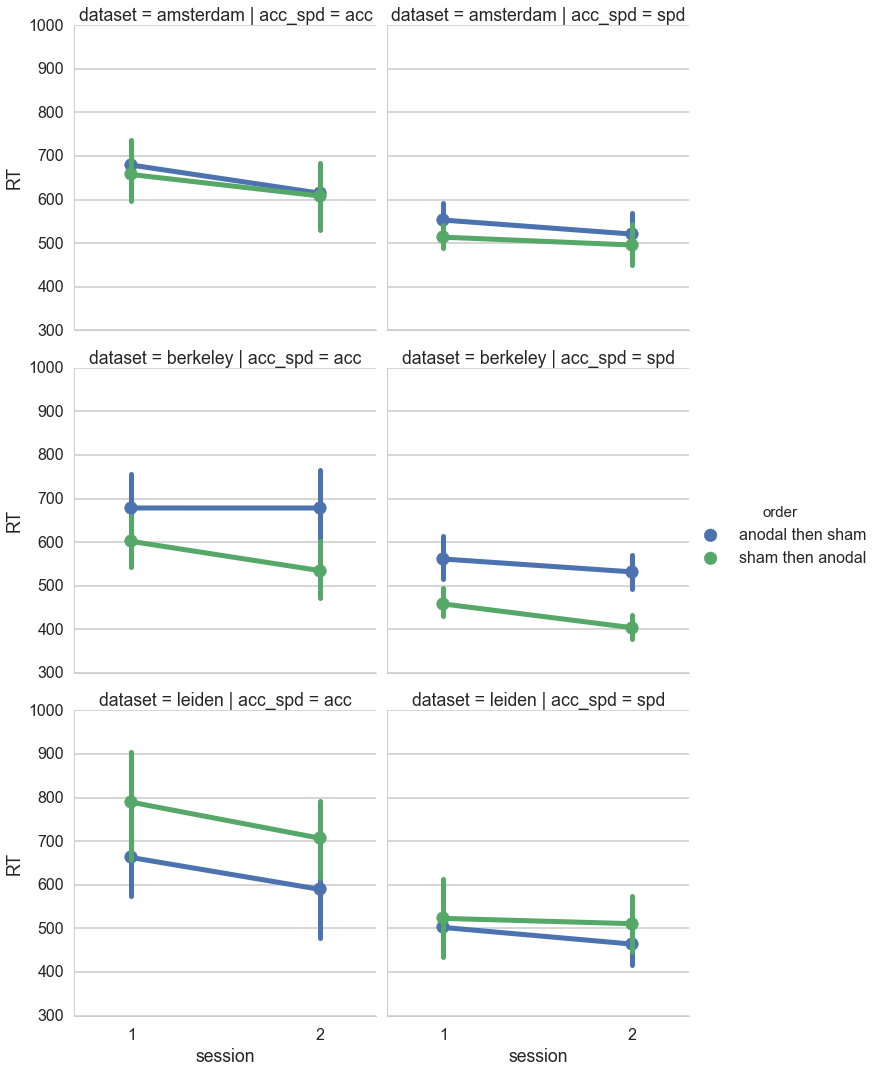

In [10]:
sns.set_style('whitegrid')
sns.set_context('poster')
sns.factorplot('session', 'RT', 'order', df, col='acc_spd', row='dataset', units='subj_idx', kind='point')

In [32]:
df.groupby(['dataset', 'order', 'subj_idx'], as_index=False).mean().groupby(['dataset', 'order']).agg([np.mean, np.std])[['RT', 'accuracy']]

RT              accuracy          
                                  mean         std      mean       std
dataset   order                                                       
amsterdam anodal then sham  592.351250   59.368451  0.708854  0.114497
          sham then anodal  569.061429   70.419981  0.759286  0.074947
berkeley  anodal then sham  612.345476   68.875165  0.740833  0.036890
          sham then anodal  498.306250   55.710845  0.756458  0.120534
leiden    anodal then sham  554.841875   99.512789  0.686667  0.159187
          sham then anodal  632.599444  107.776324  0.753194  0.100701

In [34]:
df.groupby(['dataset', 'order', 'subj_idx'], as_index=False).mean().groupby(['order']).agg([np.mean, np.std])[['RT', 'accuracy']]

RT             accuracy          
                        mean        std      mean       std
order                                                      
anodal then sham  585.389710  78.449157  0.710870  0.114479
sham then anodal  560.260794  92.791372  0.756468  0.096495

In [11]:
for dataset, d in df.groupby('dataset'):
    print '*** %s ***' % dataset
    df_g = d.groupby(['subj_idx', 'acc_spd', 'tdcs', 'order'], as_index=False).mean()
    df_g['session_factor'] = df_g['session'].apply(lambda e: 'session %s' % e)
    df_g['subj_idx'] =  df_g['subj_idx'].map(lambda x: 'S%s' % x)
    %%R -i df_g
    %%R res = aov(RT ~ acc_spd*session*order  + Error(subj_idx/(session*acc_spd)) + order, data=df_g)
    %%R print(summary(res))

*** amsterdam ***



Error: subj_idx
          Df Sum Sq Mean Sq F value Pr(>F)
order      1   7706    7706   0.474  0.503
Residuals 13 211520   16271               

Error: subj_idx:session
              Df Sum Sq Mean Sq F value   Pr(>F)    
session        1  25582   25582  20.557 0.000561 ***
session:order  1    862     862   0.692 0.420342    
Residuals     13  16178    1244                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Error: subj_idx:acc_spd
              Df Sum Sq Mean Sq F value   Pr(>F)    
acc_spd        1 206694  206694  33.795 6.04e-05 ***
acc_spd:order  1   1576    1576   0.258     0.62    
Residuals     13  79510    6116                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Error: subj_idx:session:acc_spd
                      Df Sum Sq Mean Sq F value Pr(>F)  
acc_spd:session        1   3723    3723   5.498 0.0356 *
acc_spd:session:order  1     16      16   0.023 0.8816  
Residuals             13   8802     677   

*** berkeley ***



Error: subj_idx
          Df Sum Sq Mean Sq F value  Pr(>F)   
order      1 192532  192532   12.45 0.00371 **
Residuals 13 201039   15465                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Error: subj_idx:session
              Df Sum Sq Mean Sq F value  Pr(>F)   
session        1  23634   23634  10.188 0.00708 **
session:order  1   7102    7102   3.062 0.10371   
Residuals     13  30158    2320                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Error: subj_idx:acc_spd
              Df Sum Sq Mean Sq F value   Pr(>F)    
acc_spd        1 268088  268088  27.733 0.000153 ***
acc_spd:order  1     56      56   0.006 0.940737    
Residuals     13 125667    9667                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Error: subj_idx:session:acc_spd
                      Df Sum Sq Mean Sq F value Pr(>F)
acc_spd:session        1    356   356.1   0.406  0.535
acc_spd:session:order  1   2096 

*** leiden ***



Error: subj_idx
          Df Sum Sq Mean Sq F value Pr(>F)
order      1  85764   85764   2.066  0.176
Residuals 12 498068   41506               

Error: subj_idx:session
              Df Sum Sq Mean Sq F value Pr(>F)   
session        1  39593   39593  12.147 0.0045 **
session:order  1    269     269   0.083 0.7786   
Residuals     12  39115    3260                  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Error: subj_idx:acc_spd
              Df Sum Sq Mean Sq F value   Pr(>F)    
acc_spd        1 452162  452162   28.29 0.000183 ***
acc_spd:order  1  27175   27175    1.70 0.216692    
Residuals     12 191773   15981                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Error: subj_idx:session:acc_spd
                      Df Sum Sq Mean Sq F value Pr(>F)  
acc_spd:session        1  10278   10278   5.289 0.0402 *
acc_spd:session:order  1    981     981   0.505 0.4911  
Residuals             12  23318    1943               

In [29]:
%%R -i df_g

library("BayesFactor")

bf = anovaBF(RT ~ acc_spd*session_factor*order, data=df_g, whichRandom=c("dataset", "subj_idx"), whichModels="top", iterations=1000000)

print(bf)
print(1/bf)

  |======================================================================| 100%
Bayes factor top-down analysis
--------------
When effect is omitted from acc_spd + order + session_factor + acc_spd:order + acc_spd:session_factor + order:session_factor + acc_spd:order:session_factor , BF is...
[1] Omit acc_spd:order:session_factor : 3.401572     ±1.19%
[2] Omit order:session_factor         : 4.654599     ±1.18%
[3] Omit acc_spd:session_factor       : 3.383495     ±1.44%
[4] Omit acc_spd:order                : 2.859717     ±1.19%
[5] Omit session_factor               : 0.135191     ±1.55%
[6] Omit order                        : 2.005488     ±2.04%
[7] Omit acc_spd                      : 1.308098e-14 ±1.19%

Against denominator:
  RT ~ acc_spd + order + session_factor + acc_spd:order + acc_spd:session_factor + order:session_factor + acc_spd:order:session_factor 
---
Bayes factor type: BFlinearModel, JZS

                                                                                      

## Accuracy

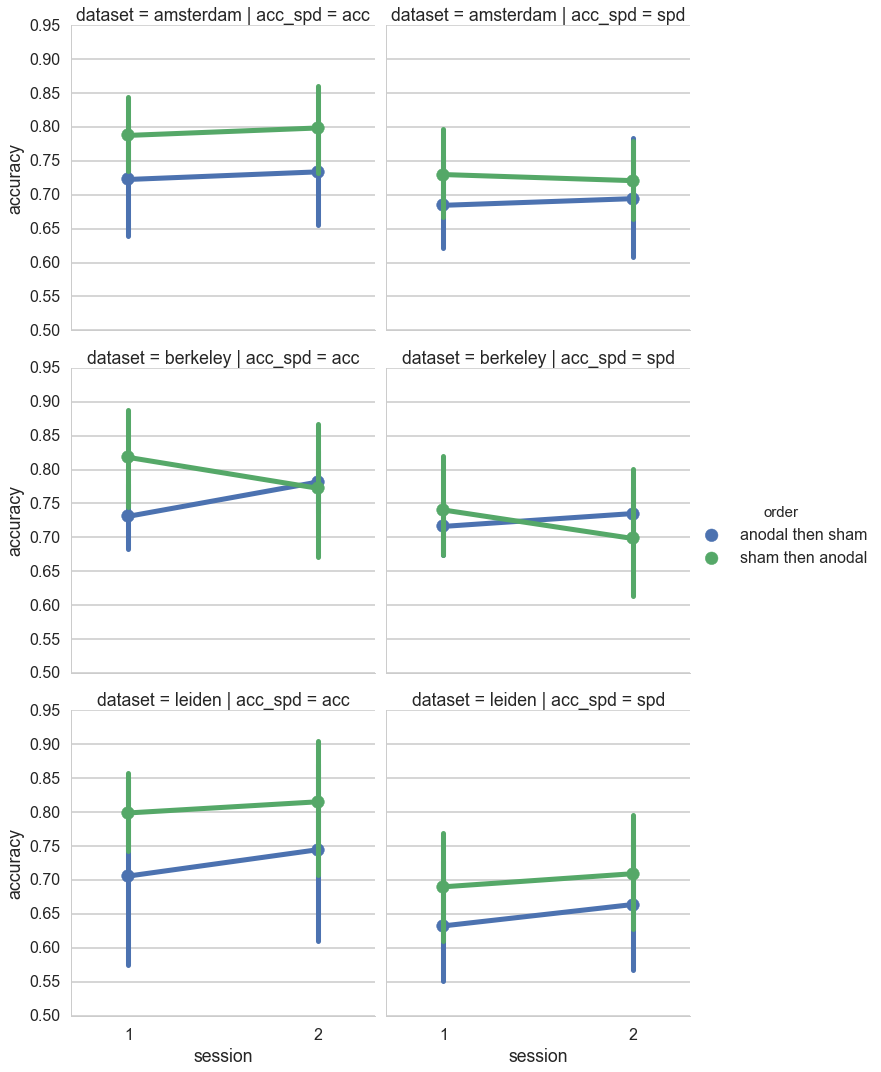

In [20]:
sns.set_style('whitegrid')
sns.set_context('poster')
sns.factorplot('session', 'accuracy', 'order', df, col='acc_spd', row='dataset', units='subj_idx', kind='point')

In [23]:
for dataset, d in df.groupby('dataset'):
    print '*** %s ***' % dataset
    df_g = d.groupby(['subj_idx', 'acc_spd', 'tdcs', 'order'], as_index=False).mean()
    df_g['session_factor'] = df_g['session'].apply(lambda e: 'session %s' % e)
    df_g['subj_idx'] =  df_g['subj_idx'].map(lambda x: 'S%s' % x)
    df_g['accuracy_arcsin'] = df_g.accuracy.apply(np.arcsin)
    %%R -i df_g
    %%R res = aov(accuracy_arcsin ~ acc_spd*session*order  + Error(subj_idx/(session*acc_spd)) + order, data=df_g)
    %%R print(summary(res))

*** amsterdam ***



Error: subj_idx
          Df Sum Sq Mean Sq F value Pr(>F)
order      1 0.0701 0.07007   0.754  0.401
Residuals 13 1.2077 0.09290               

Error: subj_idx:session
              Df  Sum Sq  Mean Sq F value Pr(>F)
session        1 0.00119 0.001194   0.262  0.618
session:order  1 0.00047 0.000469   0.103  0.754
Residuals     13 0.05937 0.004567               

Error: subj_idx:acc_spd
              Df  Sum Sq Mean Sq F value  Pr(>F)   
acc_spd        1 0.10105 0.10105  13.704 0.00266 **
acc_spd:order  1 0.00834 0.00834   1.131 0.30692   
Residuals     13 0.09585 0.00737                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Error: subj_idx:session:acc_spd
                      Df  Sum Sq   Mean Sq F value Pr(>F)
acc_spd:session        1 0.00054 0.0005384   0.213  0.652
acc_spd:session:order  1 0.00126 0.0012648   0.501  0.491
Residuals             13 0.03279 0.0025224               


*** berkeley ***



Error: subj_idx
          Df Sum Sq Mean Sq F value Pr(>F)
order      1 0.0585 0.05854   0.415  0.531
Residuals 13 1.8356 0.14120               

Error: subj_idx:session
              Df  Sum Sq Mean Sq F value Pr(>F)
session        1 0.00004 0.00004   0.003  0.960
session:order  1 0.03624 0.03624   2.654  0.127
Residuals     13 0.17750 0.01365               

Error: subj_idx:acc_spd
              Df  Sum Sq Mean Sq F value  Pr(>F)   
acc_spd        1 0.11373 0.11373    14.4 0.00223 **
acc_spd:order  1 0.01975 0.01975     2.5 0.13783   
Residuals     13 0.10269 0.00790                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Error: subj_idx:session:acc_spd
                      Df  Sum Sq  Mean Sq F value Pr(>F)
acc_spd:session        1 0.00323 0.003225   1.286  0.277
acc_spd:session:order  1 0.00351 0.003512   1.401  0.258
Residuals             13 0.03259 0.002507               


*** leiden ***



Error: subj_idx
          Df Sum Sq Mean Sq F value Pr(>F)
order      1  0.079 0.07903   0.406  0.536
Residuals 12  2.333 0.19444               

Error: subj_idx:session
              Df  Sum Sq Mean Sq F value Pr(>F)
session        1 0.03215 0.03215   3.069  0.105
session:order  1 0.00054 0.00054   0.052  0.824
Residuals     12 0.12571 0.01048               

Error: subj_idx:acc_spd
              Df Sum Sq Mean Sq F value  Pr(>F)   
acc_spd        1 0.3475  0.3475  10.329 0.00744 **
acc_spd:order  1 0.0024  0.0024   0.072 0.79274   
Residuals     12 0.4038  0.0336                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Error: subj_idx:session:acc_spd
                      Df   Sum Sq   Mean Sq F value Pr(>F)
acc_spd:session        1 0.000695 0.0006946   0.284  0.604
acc_spd:session:order  1 0.000001 0.0000009   0.000  0.985
Residuals             12 0.029314 0.0024428               


In [21]:
df_g = df.groupby(['dataset', 'subj_idx', 'acc_spd', 'session', 'order'], as_index=False).mean()
df_g['session_factor'] = df_g['session'].apply(lambda e: 'session %s' % e)
df_g['accuracy_arcsin'] = df_g.accuracy.apply(np.arcsin)

In [22]:
%%R -i df_g

library("BayesFactor")

bf = anovaBF(accuracy_arcsin ~ acc_spd*session_factor*order, data=df_g, whichRandom=c("dataset", "subj_idx"), whichModels="top", iterations=1000000)

print(bf)
print(1/bf)

  |======================================================================| 100%
Bayes factor top-down analysis
--------------
When effect is omitted from acc_spd + order + session_factor + acc_spd:order + acc_spd:session_factor + order:session_factor + acc_spd:order:session_factor , BF is...
[1] Omit acc_spd:order:session_factor : 3.42701    ±2.03%
[2] Omit order:session_factor         : 3.391495   ±2.19%
[3] Omit acc_spd:session_factor       : 4.400007   ±2.02%
[4] Omit acc_spd:order                : 3.439178   ±2.53%
[5] Omit session_factor               : 5.077274   ±2.55%
[6] Omit order                        : 0.4002402  ±2.47%
[7] Omit acc_spd                      : 0.01240734 ±2.54%

Against denominator:
  accuracy_arcsin ~ acc_spd + order + session_factor + acc_spd:order + acc_spd:session_factor + order:session_factor + acc_spd:order:session_factor 
---
Bayes factor type: BFlinearModel, JZS

                                                                                       

## Threshold parameter

In [35]:
import pickle as pkl
params = pkl.load(open('/Users/Gilles/Dropbox/Science/tdcs/data/fitted_params_fastdm.pkl'))

In [43]:
pars = params.melted_parameters('a')
pars['response regime'] = pars['acc_spd'].map({'acc':'accuracy', 'spd':'speed'})
pars['dataset'] = pars.subj_idx.apply(lambda row: row[0]).map({'S':'berkeley', 'L':'leiden', 'A':'amsterdam'})
pars['subj_idx'] = pars.subj_idx.apply(lambda row: int(row[1:]))

d = df.groupby(['dataset','subj_idx','tdcs','response regime','session']).size().reset_index()
d['subj_idx'] = d.subj_idx.astype(int)
pars = pars.merge(d.reset_index()[['dataset', 'subj_idx', 'tdcs', 'response regime', 'session']], on=['dataset', 'tdcs', 'subj_idx', 'response regime'], how='left')

pars['order'] = pars.apply(get_order, 1)
pars['session_factor'] = pars.session.apply(lambda e: 'session %s' % e)

In [44]:
for dataset, d in pars.groupby('dataset'):
    print '*** %s ***' % dataset
    df_g = d.groupby(['subj_idx', 'acc_spd', 'tdcs', 'order'], as_index=False).mean()
    df_g['session_factor'] = df_g['session'].apply(lambda e: 'session %s' % e)
    df_g['subj_idx'] =  df_g['subj_idx'].map(lambda x: 'S%s' % x)
    %%R -i df_g
    %%R res = aov(a ~ acc_spd*session*order  + Error(subj_idx/(session*acc_spd)) + order, data=df_g)
    %%R print(summary(res))

*** amsterdam ***



Error: subj_idx
          Df Sum Sq Mean Sq F value Pr(>F)
order      1 0.0261 0.02611   0.616  0.447
Residuals 13 0.5508 0.04237               

Error: subj_idx:session
              Df  Sum Sq Mean Sq F value Pr(>F)  
session        1 0.08158 0.08158   8.491 0.0121 *
session:order  1 0.01272 0.01272   1.324 0.2706  
Residuals     13 0.12489 0.00961                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Error: subj_idx:acc_spd
              Df Sum Sq Mean Sq F value   Pr(>F)    
acc_spd        1 0.6252  0.6252  28.843 0.000127 ***
acc_spd:order  1 0.0178  0.0178   0.822 0.380971    
Residuals     13 0.2818  0.0217                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Error: subj_idx:session:acc_spd
                      Df  Sum Sq  Mean Sq F value Pr(>F)
acc_spd:session        1 0.00180 0.001802   0.256  0.621
acc_spd:session:order  1 0.00001 0.000012   0.002  0.968
Residuals             13 0.09142 0.007032             

*** berkeley ***



Error: subj_idx
          Df Sum Sq Mean Sq F value Pr(>F)
order      1 0.0040 0.00404   0.078  0.784
Residuals 13 0.6714 0.05164               

Error: subj_idx:session
              Df  Sum Sq Mean Sq F value Pr(>F)
session        1 0.04588 0.04588   2.854  0.115
session:order  1 0.02841 0.02841   1.767  0.207
Residuals     13 0.20899 0.01608               

Error: subj_idx:acc_spd
              Df Sum Sq Mean Sq F value   Pr(>F)    
acc_spd        1 0.9024  0.9024  25.334 0.000229 ***
acc_spd:order  1 0.0146  0.0146   0.411 0.532467    
Residuals     13 0.4631  0.0356                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Error: subj_idx:session:acc_spd
                      Df  Sum Sq  Mean Sq F value Pr(>F)  
acc_spd:session        1 0.00133 0.001333   0.273 0.6099  
acc_spd:session:order  1 0.02252 0.022521   4.618 0.0511 .
Residuals             13 0.06340 0.004877                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’

*** leiden ***



Error: subj_idx
          Df Sum Sq Mean Sq F value Pr(>F)
order      1 0.0763 0.07629   0.594  0.456
Residuals 12 1.5403 0.12836               

Error: subj_idx:session
              Df  Sum Sq Mean Sq F value Pr(>F)  
session        1 0.08460 0.08460   5.864 0.0322 *
session:order  1 0.03007 0.03007   2.084 0.1744  
Residuals     12 0.17312 0.01443                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Error: subj_idx:acc_spd
              Df Sum Sq Mean Sq F value Pr(>F)    
acc_spd        1 1.6339  1.6339  21.255 0.0006 ***
acc_spd:order  1 0.0403  0.0403   0.525 0.4827    
Residuals     12 0.9225  0.0769                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Error: subj_idx:session:acc_spd
                      Df  Sum Sq  Mean Sq F value Pr(>F)
acc_spd:session        1 0.00042 0.000422   0.067  0.801
acc_spd:session:order  1 0.00199 0.001986   0.314  0.586
Residuals             12 0.07595 0.006329               


In [45]:
%%R -i pars

library("BayesFactor")

bf = anovaBF(a ~ acc_spd*session_factor*order, data=pars, whichRandom=c("dataset", "subj_idx"), whichModels="top", iterations=1000000)

print(bf)
print(1/bf)

  |======================================================================| 100%
Bayes factor top-down analysis
--------------
When effect is omitted from acc_spd + order + session_factor + acc_spd:order + acc_spd:session_factor + order:session_factor + acc_spd:order:session_factor , BF is...
[1] Omit acc_spd:order:session_factor : 2.595947     ±20.18%
[2] Omit order:session_factor         : 3.437576     ±20.16%
[3] Omit acc_spd:session_factor       : 3.707317     ±20.1%
[4] Omit acc_spd:order                : 1.677384     ±20.1%
[5] Omit session_factor               : 0.2566732    ±20.1%
[6] Omit order                        : 4.861844     ±20.16%
[7] Omit acc_spd                      : 6.718442e-16 ±20.14%

Against denominator:
  a ~ acc_spd + order + session_factor + acc_spd:order + acc_spd:session_factor + order:session_factor + acc_spd:order:session_factor 
---
Bayes factor type: BFlinearModel, JZS

                                                                                   